In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
pull1 = pickle.load(open( "TweetsRetrievalTool-1.2/harvey-tweets-pull.pkl", "rb" ) )

In [3]:
pull2 = pickle.load(open( "TweetsRetrievalTool-1.2/harvey-tweets2-pull.pkl", "rb" ) )
# pull4a = pickle.load(open( "TweetsRetrievalTool-1.2/harvey-tweets4a-pull.pkl", "rb" ) )
# pull4b = pickle.load(open( "TweetsRetrievalTool-1.2/harvey-tweets4b-pull.pkl", "rb" ) )

In [4]:
pull3 = pickle.load(open( "TweetsRetrievalTool-1.2/harvey-tweets3-pull.pkl", "rb" ) )

In [5]:
def get_tweet_metadata(tweet,meta_dict):
    meta_dict['storm'] = 'Harvey'
    try: meta_dict['id']  = tweet['id']
    except: pass
    try: meta_dict['user_id']  = tweet['entities']['user_mentions'][0]['id']
    except: pass
    try: meta_dict['user_name']  = tweet['entities']['user_mentions'][0]['name']
    except: pass
    try: meta_dict['datetime'] = tweet['created_at']
    except: pass
    try: meta_dict['media'] = tweet['entities']['media'][0]['media_url']
    except: pass
    try: meta_dict['media_type'] = tweet['extended_entities']['media'][0]['type']
    except: pass
    try: meta_dict['coords'] = tweet['geo']['coordinates']
    except: pass
    try: meta_dict['text'] = tweet['text']
    except: pass
    try: 
        hashtags_text = tweet['entities']['hashtags']
        hashtags = []
        for i in hashtags_text:
            hashtags.append(i['text'])
        meta_dict['hashtags'] = hashtags
    except: pass
    try: meta_dict['followers'] = tweet['extended_entities']['media'][0]['additional_media_info']['source_user']['followers_count']
    except: pass
    try: meta_dict['following'] = tweet['extended_entities']['media'][0]['additional_media_info']['source_user']['friends_count']
    except: pass
    try: meta_dict['user_location'] = tweet['extended_entities']['media'][0]['additional_media_info']['source_user']['location']
    except: pass
    try: meta_dict['retweets'] = tweet['retweet_count']
    except: pass

In [6]:
tweet_pulls = [pull1,pull2,pull3]
aggregate_metadata = []

for pull in tweet_pulls:
    for tweet in pull:
        meta_dict = {}
        get_tweet_metadata(tweet,meta_dict)
        aggregate_metadata.append(meta_dict)
    

In [7]:
pickle.dump(aggregate_metadata, open( "aggregate_metadata.pkl", "wb" ) )

In [8]:
df = pd.DataFrame(aggregate_metadata)
# df.head()

In [9]:
df.head()

,coords,datetime,followers,following,hashtags,id,media,media_type,retweets,storm,text,user_id,user_location,user_name
0,NaN,Sun Aug 27 03:22:27 +0000 2017,NaN,NaN,"[KHOU11, Houston, HurricaneHarvey]",901646060912877568,NaN,NaN,2783,Harvey,RT @AlexandriaKHOU: This is Allen Parkway in f...,7.152734e+17,NaN,Alexandria Williams
1,NaN,Sun Aug 27 03:22:27 +0000 2017,NaN,NaN,[],901646059704901632,NaN,NaN,41403,Harvey,RT @ahleeyou: God punish us with a huge storm ...,8.786483e+08,NaN,Alieu
2,NaN,Sun Aug 27 03:22:22 +0000 2017,NaN,NaN,"[KHOU11, Houston, HurricaneHarvey]",901646040650194944,NaN,NaN,2783,Harvey,RT @AlexandriaKHOU: This is Allen Parkway in f...,7.152734e+17,NaN,Alexandria Williams
3,NaN,Sun Aug 27 03:22:22 +0000 2017,NaN,NaN,[hurricaneharvey],901646042579468288,NaN,NaN,14748,Harvey,RT @dariusherron1: The differences in damage a...,1.680892e+09,NaN,Darius
4,NaN,Sun Aug 27 03:22:23 +0000 2017,NaN,NaN,[],901646046736007172,NaN,NaN,65229,Harvey,RT @__wag_: RT this for all my folk in Houston...,7.678133e+08,NaN,🅱roly.


# Clean metadata

In [11]:
import time
from datetime import time
from datetime import datetime
import re

In [12]:
timestamp = []
date_out = []
weekday = []

dates = df['datetime']
for i in dates:
    date = re.sub('\+0000 ', '', i)
    datetime = datetime.strptime(date, "%a %b %d %X %Y") 
    timestamp.append(datetime)
    date_out.append(datetime.date())
    weekday.append(datetime.weekday())

In [14]:
df['timestamp'] = timestamp
df['date'] = date_out
df['weekday'] = weekday


In [15]:
df.head()

,coords,datetime,followers,following,hashtags,id,media,media_type,retweets,storm,text,user_id,user_location,user_name,timestamp,date,weekday
0,NaN,Sun Aug 27 03:22:27 +0000 2017,NaN,NaN,"[KHOU11, Houston, HurricaneHarvey]",901646060912877568,NaN,NaN,2783,Harvey,RT @AlexandriaKHOU: This is Allen Parkway in f...,7.152734e+17,NaN,Alexandria Williams,2017-08-27 03:22:27,2017-08-27,6
1,NaN,Sun Aug 27 03:22:27 +0000 2017,NaN,NaN,[],901646059704901632,NaN,NaN,41403,Harvey,RT @ahleeyou: God punish us with a huge storm ...,8.786483e+08,NaN,Alieu,2017-08-27 03:22:27,2017-08-27,6
2,NaN,Sun Aug 27 03:22:22 +0000 2017,NaN,NaN,"[KHOU11, Houston, HurricaneHarvey]",901646040650194944,NaN,NaN,2783,Harvey,RT @AlexandriaKHOU: This is Allen Parkway in f...,7.152734e+17,NaN,Alexandria Williams,2017-08-27 03:22:22,2017-08-27,6
3,NaN,Sun Aug 27 03:22:22 +0000 2017,NaN,NaN,[hurricaneharvey],901646042579468288,NaN,NaN,14748,Harvey,RT @dariusherron1: The differences in damage a...,1.680892e+09,NaN,Darius,2017-08-27 03:22:22,2017-08-27,6
4,NaN,Sun Aug 27 03:22:23 +0000 2017,NaN,NaN,[],901646046736007172,NaN,NaN,65229,Harvey,RT @__wag_: RT this for all my folk in Houston...,7.678133e+08,NaN,🅱roly.,2017-08-27 03:22:23,2017-08-27,6


In [96]:
df.iloc[3,:]['text']

'RT @dariusherron1: The differences in damage a category 1, 2, 3, 4, &amp; 5 hurricane can cause.  #hurricaneharvey\n\n https://t.co/sDP76piZ8N'

## Text cleaning
need to remove:
    - stop words
    - non-ascii characters (maybe bring back emojis later?)
    - punctuation
    - numbers
    - URLs
    - hashtags
    

In [47]:
documents = list(df.text)

In [50]:
import string
cleaned_docs = []
for doc in documents:
#     doc = re.sub('#\S*', ' ', doc)
    doc = re.sub('RT ', ' ', doc)
    doc = re.sub('@\S*', ' ', doc)
    doc = re.sub('&amp ', ' ', doc)
    doc = re.sub('https:\S*', '', doc)
    doc = re.sub('\\n', ' ', doc)
    doc = re.sub('[0-9]', '', doc)
    exclude = set('!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'+'…')
    doc = ''.join(ch for ch in doc if ch not in exclude)
    cleaned_docs.append(doc)

In [30]:
from nltk.tokenize.casual import TweetTokenizer

In [31]:
s = 'Also near my house  I have idea how you captured this scene 😱 '
s1 = TweetTokenizer().tokenize(s)
print (s1)

['Also', 'near', 'my', 'house', 'I', 'have', 'idea', 'how', 'you', 'captured', 'this', 'scene', '😱']


In [53]:
len(cleaned_docs)

1641411

# Top bigrams

In [52]:
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')
stop += ['every','like','amp']
counter = Counter()

n = 2
for doc in cleaned_docs:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)



In [46]:
for phrase, count in counter.most_common(10):
    phrase = " ".join(phrase)
    print(phrase+': '+str(count))

Hurricane Harvey: 1701
help affected: 370
relief efforts: 367
Houston area: 337
donate post: 330
post gets: 328
HurricaneHarvey relief: 319
Sigma Nu: 315
Nu donate: 315
gets Houston: 315


## EDA

## Tweets over time

In [16]:
date_group = df.groupby(['date']).count().reset_index()

In [17]:
date_group

,date,coords,datetime,followers,following,hashtags,id,media,media_type,retweets,storm,text,user_id,user_location,user_name,timestamp,weekday
0,2017-08-27,80,106945,4719,4719,106945,106945,14720,14720,106945,106945,106945,88952,4719,88952,106945,106945
1,2017-08-29,298,627137,22654,22654,627137,627137,57172,57172,627137,627137,627137,530703,22654,530703,627137,627137
2,2017-08-30,404,907329,36177,36177,907329,907329,81739,81739,907329,907329,907329,779697,36177,779697,907329,907329


In [18]:
date_group['date'] = date_group['date'].apply(str)

In [42]:
#note that there is a file of tweets missing ids that could be used, but it's missing some of the metadata
# missing_df = pd.read_csv('ISCRAM18_datasets/Harvey_missing_ids_50K.csv', sep='\t')
# len(missing_df)

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f6d522c8390>,
 <a list of 3 Text xticklabel objects>)

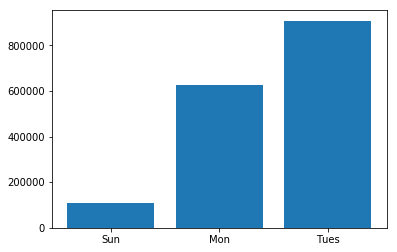

In [22]:
plt.bar(date_group['date'], date_group['id'])
plt.xticks(np.arange(3),('Sun','Mon','Tues'))

## Sentiment Analysis